# 0. Install and Import Dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5 MB 8.1 kB/s 
     |████████████████████████████████| 412.3 MB 28 kB/s 
     |████████████████████████████████| 240 kB 25.9 MB/s 
     |████████████████████████████████| 171 kB 51.6 MB/s 
     |████████████████████████████████| 3.8 MB 55.5 MB/s 
     |████████████████████████████████| 503 kB 38.5 MB/s 
     |████████████████████████████████| 50 kB 8.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=06551e33f2b138035e6faf2ff9183d3761b5d0e2e4e43eff49be02d58c61f085
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorb

In [2]:
# Gym Stuff
import gym
import gym_anytrading

# stable baselines - RL
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# 1. Bring Marketwatch GME Data

https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
%ls

drive/  sample_data/


In [5]:
%cd '/content/drive/MyDrive/06-AI/Reinforcement_Learning/'

/content/drive/MyDrive/06-AI/Reinforcement_Learning


In [6]:
%ls

'GME_20210225 to 20220225.csv'  'Trading RL_v2.ipynb'
'Trading RL.ipynb'               Untitled0.ipynb


In [49]:
df=pd.read_csv('GME_20210225 to 20220225.csv')

In [50]:
df.head()

,Date,Open,High,Low,Close,Volume
0,02/25/2022,123.57,124.97,116.49,118.58,"1,694,150"
1,02/24/2022,105.53,125.71,104.12,124.58,"2,256,212"
2,02/23/2022,121.22,123.36,114.28,114.87,"1,348,252"
3,02/22/2022,118.20,123.33,114.19,118.06,"1,539,113"
4,02/18/2022,124.20,125.65,118.13,121.53,"1,553,539"


In [55]:
df.sort_values('Date', ascending=True, inplace = True)
df.head()

,Date,Open,High,Low,Close,Volume
253,2021-02-25,169.56,184.68,101.00,108.73,"150,308,797"
252,2021-02-26,117.46,142.90,86.00,101.74,"92,194,148"
251,2021-03-01,104.54,133.99,99.97,120.40,"49,793,969"
250,2021-03-02,116.93,133.20,112.20,118.18,"33,783,039"
249,2021-03-03,122.51,127.75,113.12,124.18,"19,273,881"


In [56]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [57]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [58]:
df

,Date,Open,High,Low,Close,Volume
253,2021-02-25,169.56,184.68,101.00,108.73,"150,308,797"
252,2021-02-26,117.46,142.90,86.00,101.74,"92,194,148"
251,2021-03-01,104.54,133.99,99.97,120.40,"49,793,969"
250,2021-03-02,116.93,133.20,112.20,118.18,"33,783,039"
249,2021-03-03,122.51,127.75,113.12,124.18,"19,273,881"
...,...,...,...,...,...,...
4,2022-02-18,124.20,125.65,118.13,121.53,"1,553,539"
3,2022-02-22,118.20,123.33,114.19,118.06,"1,539,113"
2,2022-02-23,121.22,123.36,114.28,114.87,"1,348,252"
1,2022-02-24,105.53,125.71,104.12,124.58,"2,256,212"


In [59]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-02-25,169.56,184.68,101.00,108.73,"150,308,797"
2021-02-26,117.46,142.90,86.00,101.74,"92,194,148"
2021-03-01,104.54,133.99,99.97,120.40,"49,793,969"
2021-03-02,116.93,133.20,112.20,118.18,"33,783,039"
2021-03-03,122.51,127.75,113.12,124.18,"19,273,881"


In [60]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size = 5)

In [61]:
env.prices

array([108.73, 101.74, 120.4 , 118.18, 124.18, 132.35, 137.74, 194.5 ,
       246.9 , 265.  , 260.  , 264.5 , 220.14, 208.17, 209.81, 201.75,
       200.27, 194.49, 181.75, 120.34, 183.75, 181.  , 181.3 , 194.46,
       189.82, 191.45, 186.95, 184.5 , 177.97, 170.26, 158.36, 141.09,
       140.99, 166.53, 156.44, 154.69, 164.37, 158.53, 158.51, 151.17,
       151.18, 168.93, 177.77, 178.58, 176.19, 173.59, 162.2 , 160.73,
       159.48, 161.01, 161.11, 143.22, 146.92, 144.79, 164.5 , 159.92,
       180.6 , 180.67, 168.83, 170.49, 176.79, 180.01, 209.43, 242.56,
       254.13, 222.  , 249.02, 282.24, 258.18, 248.36, 280.01, 300.  ,
       302.56, 220.39, 233.34, 229.44, 222.5 , 222.97, 223.59, 213.82,
       200.37, 220.4 , 219.34, 212.31, 209.51, 213.25, 210.88, 214.14,
       204.36, 202.83, 199.56, 190.66, 191.38, 191.23, 189.25, 180.06,
       167.62, 166.82, 169.04, 173.49])

In [62]:
env.signal_features

array([[ 1.0873e+02,  0.0000e+00],
       [ 1.0174e+02, -6.9900e+00],
       [ 1.2040e+02,  1.8660e+01],
       [ 1.1818e+02, -2.2200e+00],
       [ 1.2418e+02,  6.0000e+00],
       [ 1.3235e+02,  8.1700e+00],
       [ 1.3774e+02,  5.3900e+00],
       [ 1.9450e+02,  5.6760e+01],
       [ 2.4690e+02,  5.2400e+01],
       [ 2.6500e+02,  1.8100e+01],
       [ 2.6000e+02, -5.0000e+00],
       [ 2.6450e+02,  4.5000e+00],
       [ 2.2014e+02, -4.4360e+01],
       [ 2.0817e+02, -1.1970e+01],
       [ 2.0981e+02,  1.6400e+00],
       [ 2.0175e+02, -8.0600e+00],
       [ 2.0027e+02, -1.4800e+00],
       [ 1.9449e+02, -5.7800e+00],
       [ 1.8175e+02, -1.2740e+01],
       [ 1.2034e+02, -6.1410e+01],
       [ 1.8375e+02,  6.3410e+01],
       [ 1.8100e+02, -2.7500e+00],
       [ 1.8130e+02,  3.0000e-01],
       [ 1.9446e+02,  1.3160e+01],
       [ 1.8982e+02, -4.6400e+00],
       [ 1.9145e+02,  1.6300e+00],
       [ 1.8695e+02, -4.5000e+00],
       [ 1.8450e+02, -2.4500e+00],
       [ 1.7797e+02,

# 2. Build Environment

In [63]:
env.action_space

Discrete(2)

info {'total_reward': 190.86999999999998, 'total_profit': 1.8074684214982215, 'position': 0}


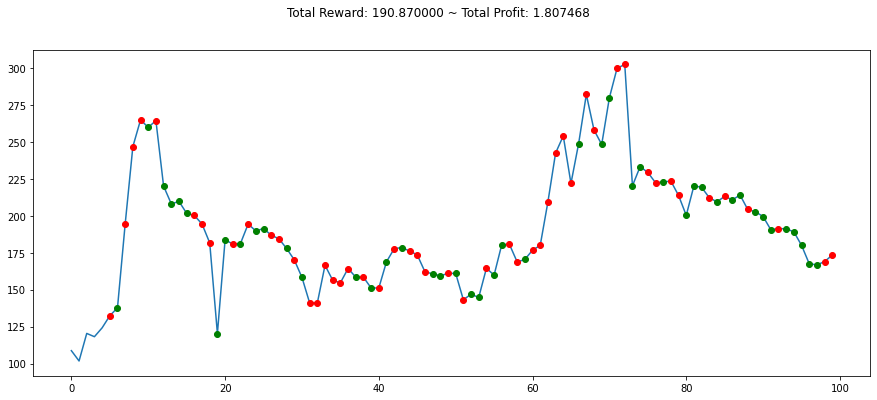

In [64]:
state = env.reset()
while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# **2.1 Add Custom Indicators**

 **2.1.1. Install and Import New Dependencies**
 https://github.com/peerchemist/finta

In [24]:
!pip install finta

In [25]:
from gym_anytrading.envs import StocksEnv
from finta import TA

**2.1.2. Fix Volume Column**

In [43]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [65]:
df['Volume'] = df['Volume'].str.replace(',','')
df['Volume'] = df['Volume'].astype(float)
df['Volume'] 

Date
2021-02-25    150308797.0
2021-02-26     92194148.0
2021-03-01     49793969.0
2021-03-02     33783039.0
2021-03-03     19273881.0
                 ...     
2022-02-18      1553539.0
2022-02-22      1539113.0
2022-02-23      1348252.0
2022-02-24      2256212.0
2022-02-25      1694150.0
Name: Volume, Length: 254, dtype: float64

**2.1.3. Calculate SMA, RSI and OBV**

In [68]:
df['SMA'] = TA.SMA(df,12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace = True)

In [69]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-02-25,169.56,184.68,101.00,108.73,150308797.0,0.000000,0.000000,0.0
2021-02-26,117.46,142.90,86.00,101.74,92194148.0,0.000000,0.000000,-92194148.0
2021-03-01,104.54,133.99,99.97,120.40,49793969.0,0.000000,74.192724,-42400179.0
2021-03-02,116.93,133.20,112.20,118.18,33783039.0,0.000000,67.752342,-76183218.0
2021-03-03,122.51,127.75,113.12,124.18,19273881.0,0.000000,74.256617,-56909337.0
2021-03-04,125.00,147.87,115.30,132.35,32606891.0,0.000000,80.132774,-24302446.0
2021-03-05,128.17,151.53,127.50,137.74,30733670.0,0.000000,82.905108,6431224.0
2021-03-08,154.89,210.87,146.10,194.50,63565621.0,0.000000,93.380515,69996845.0
2021-03-09,217.71,249.85,208.51,246.90,39099328.0,0.000000,95.886540,109096173.0


**2.1.4. Creat New Environments**

In [70]:
def add_signals(env):
  start = env.frame_bound[0] - env.window_size
  end = env.frame_bound[1]
  prices = env.df.loc[:,'Low'].to_numpy()[start:end]
  signal_features = env.df.loc[:,['Low','Volume', 'SMA', 'RSI', 'OBV']].to_numpy()[start:end]
  return prices, signal_features

In [89]:
class MyCustomEnv(StocksEnv):
  _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,100))

In [90]:
env2.prices

array([101.  ,  86.  ,  99.97, 112.2 , 113.12, 115.3 , 127.5 , 146.1 ,
       208.51, 172.  , 232.6 , 262.27, 206.  , 172.35, 204.  , 195.65,
       182.66, 186.2 , 177.55, 118.62, 116.9 , 163.26, 173.51, 182.  ,
       187.11, 183.6 , 164.81, 183.56, 176.11, 164.3 , 153.  , 135.01,
       132.  , 143.  , 152.8 , 151.25, 162.33, 153.36, 155.92, 146.86,
       144.7 , 148.76, 173.17, 166.03, 170.75, 172.7 , 159.61, 151.8 ,
       158.33, 155.6 , 157.5 , 143.  , 136.5 , 142.23, 146.43, 156.22,
       159.  , 168.27, 164.15, 166.9 , 170.33, 173.35, 181.  , 225.55,
       227.  , 221.43, 227.07, 244.3 , 242.12, 245.77, 255.2 , 281.  ,
       291.51, 211.  , 206.13, 219.2 , 208.  , 209.  , 221.48, 213.  ,
       197.  , 209.17, 214.12, 211.6 , 198.5 , 210.2 , 208.01, 206.94,
       202.  , 196.5 , 193.71, 177.56, 179.5 , 186.75, 187.42, 179.  ,
       165.07, 158.01, 166.3 , 161.22])

In [91]:
env2.signal_features

array([[ 1.01000000e+02,  1.50308797e+08,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 8.60000000e+01,  9.21941480e+07,  0.00000000e+00,
         0.00000000e+00, -9.21941480e+07],
       [ 9.99700000e+01,  4.97939690e+07,  0.00000000e+00,
         7.41927239e+01, -4.24001790e+07],
       [ 1.12200000e+02,  3.37830390e+07,  0.00000000e+00,
         6.77523416e+01, -7.61832180e+07],
       [ 1.13120000e+02,  1.92738810e+07,  0.00000000e+00,
         7.42566168e+01, -5.69093370e+07],
       [ 1.15300000e+02,  3.26068910e+07,  0.00000000e+00,
         8.01327744e+01, -2.43024460e+07],
       [ 1.27500000e+02,  3.07336700e+07,  0.00000000e+00,
         8.29051085e+01,  6.43122400e+06],
       [ 1.46100000e+02,  6.35656210e+07,  0.00000000e+00,
         9.33805146e+01,  6.99968450e+07],
       [ 2.08510000e+02,  3.90993280e+07,  0.00000000e+00,
         9.58865397e+01,  1.09096173e+08],
       [ 1.72000000e+02,  7.15705700e+07,  0.00000000e+00,
         9.63943246e+01

In [92]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-02-25,169.56,184.68,101.00,108.73,150308797.0,0.0,0.000000,0.0
2021-02-26,117.46,142.90,86.00,101.74,92194148.0,0.0,0.000000,-92194148.0
2021-03-01,104.54,133.99,99.97,120.40,49793969.0,0.0,74.192724,-42400179.0
2021-03-02,116.93,133.20,112.20,118.18,33783039.0,0.0,67.752342,-76183218.0
2021-03-03,122.51,127.75,113.12,124.18,19273881.0,0.0,74.256617,-56909337.0


# 3. Build Environment and Train

In [93]:
# env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size = 5)
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose = 1)
model.learn(total_timesteps=1000000)

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | -218     |
| fps                | 9        |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 0.00442  |
---------------------------------
---------------------------------
| explained_variance | 0.000182 |
| fps                | 285      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 984      |
---------------------------------
---------------------------------
| explained_variance | 0.00426  |
| fps                | 362      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 108      |
---------------------------------
---------------------------------
| explained_variance | -0.00344 |
| fps                | 397      |
| nupdates           | 300      |
| policy_entr

# 4. Evaluation

In [104]:
# env = gym.make('stocks-v0', df=df, frame_bound=(190,240), window_size = 5)
env = MyCustomEnv(df=df, window_size=12, frame_bound=(12,100))
obs= env.reset()
while True:
  obs = obs[np.newaxis,...]
  action,_states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  if done:
    print("info", info)
    break


info {'total_reward': -54.329999999999984, 'total_profit': 0.6990133663507312, 'position': 1}


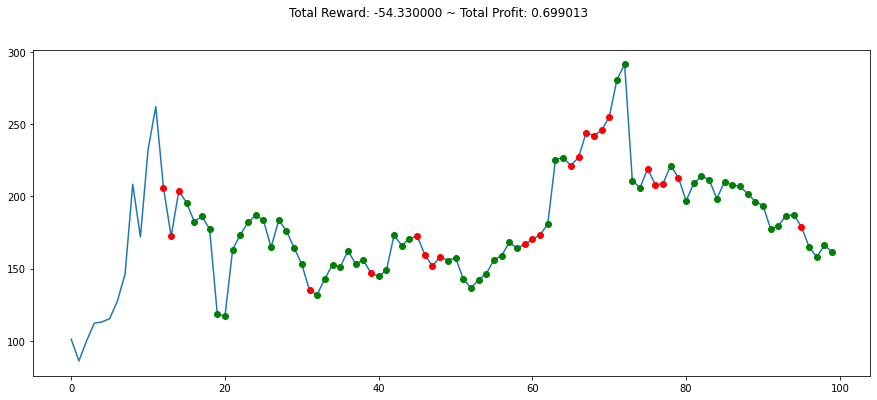

In [105]:

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()